<a href="https://colab.research.google.com/github/Du-nara/ME421-Mechanical-Systems-Lab-A3/blob/main/Vibration/E_20_388_Vibration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Week #1**

## Activity #1

Derive the 2-dof freedom model that will capture the first two dominant modes of small amplitude vibration of the system.

Let the beam have:

*   Length L, bending stiffness EI, mass per unit length ρA
*   Left end pinned at x=0
*   Right end at x=L connected to a vertical spring of stiffness $k_s$ to the frame
*   Unbalanced motor attached at x=a (given “middle,” so typically a=L/2) with lumped mass m
*   The unbalance provides a vertical harmonic force at x=a:
<center>$F(t) = F_0 \sin(\omega t)$ </center>
<center>$F_0 = m u_e \omega^2$ </center>

(This is the forcing, not an additional DOF.)

We model small transverse vibration w(x,t) in one plane.


Approximate the beam deflection by a two-term expansion:
<center>$w(x,t) = \phi_1(x)q_1(t) + \phi_2(x)q_2(t)$</center>

Here:

*   $\phi_1(x), \phi_2(x)$ are chosen “shape functions”
*   $q_1(t), q_2(t)$ are the two DOFs (generalized coordinates)

A common, simple choice that satisfies the essential pinned displacement condition w(0,t)=0 is:

<center>$\phi_1(x) = \sin\left(\frac{\pi x}{L}\right), \quad \phi_2(x) = \sin\left(\frac{2\pi x}{L}\right)$</center>

These work well for a 2-mode approximation in labs, and the spring at x=L will be handled through the spring energy term (below).

Beam kinetic energy:

<center>$T_b = \frac{1}{2} \int_0^L \rho A \dot{w}^2 dx$</center>

Motor lumped mass kinetic energy at x=a:
<center>$T_m = \frac{1}{2} m_m \dot{w}(a,t)^2$</center>

Total:
<center>$T = T_b + T_m$</center>

\
Substitute  
 <center>$w(x,t) = \sum \phi_i q_i, \quad \dot{w} = \sum \phi_i \dot{q}_i$</center>


<center> $T = \frac{1}{2} \sum_{i=1}^{2} \sum_{j=1}^{2} \dot{q}_i \dot{q}_j \left[ \int_0^L \rho A \phi_i \phi_j \,dx + m_m \phi_i(a) \phi_j(a) \right]
$</center>

\
So the mass matrix entries are:

<center> $M_{ij}=\int_0^L \rho A \phi_i \phi_j \, dx + m_m \phi_i(a) \phi_j(a)$</center>

Beam bending strain energy:

<center> $V_b = \frac{1}{2} \int_0^L EI (w'')^2 dx
$</center>

Spring potential energy at the right end:
<center>$V_s = \frac{1}{2} k_s w(L,t)^2
$</center>

Total:
<center>$V = V_b + V_s
$</center>

Substitute
<center>$w = \sum \phi_i q_i , \quad w'' = \sum \phi_i'' q_i
$</center>


<center>$V = \frac{1}{2} \sum_{i=1}^{2} \sum_{j=1}^{2} q_i q_j \left[ \int_0^L EI \phi_i'' \phi_j'' \,dx + k_s \phi_i(L) \phi_j(L) \right]
$</center>

So the stiffness matrix entries are:

<center>$K_{ij} = \int_0^L EI \phi_i'' \phi_j'' \,dx + k_s \phi_i(L) \phi_j(L)
$</center>
	​

Force applied at x=a: F(t) (vertical)

Using virtual work / modal projection, generalized force:

<center>$Q_i(t) = F(t) \phi_i(a)
$</center>

So the forcing vector is:
<center>$Q(t) = F_0 \sin(\omega t) \begin{bmatrix} \phi_1(a) \\ \phi_2(a) \end{bmatrix}
$</center>

Using Lagrange’s equations:
<center>$M \ddot{q} + K q = Q(t)
$</center>

where <center>$q = \begin{bmatrix} q_1 \\ q_2 \end{bmatrix}$</center>


# Activity #2

Estimate the damping ratios of the first two dominant modes.

For a lightly damped mode, the damping ratio is related to the bandwidth of the resonance peak at the half-power points.

At resonance peak amplitude Xmax, considering (*finding*) the two frequencies $f_1$ and $f_2$ where the amplitude drops to:

<center>$X = \frac{X_{\text{max}}}{\sqrt{2}}
$</center>

These are the “half-power points.”

Let $f_n$ be the resonant frequency (peak frequency) of that mode.

Then:

<center>$\zeta = \frac{f_1 - f_2}{2f_n}
$</center>

Equivalent in rad/s:

<center>$\zeta = \frac{\omega_1 - \omega_2}{2\omega_n}$</center>


# Activity #3

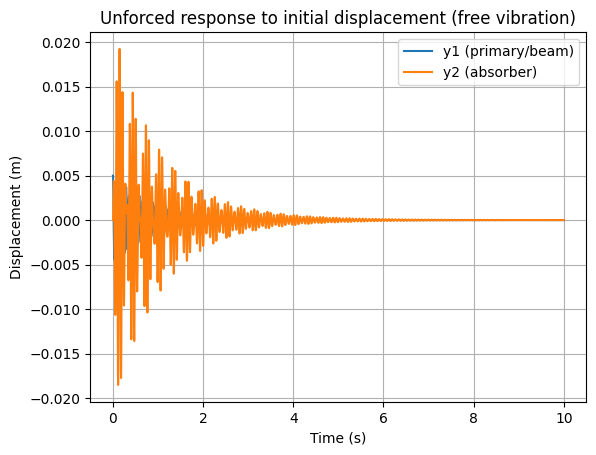

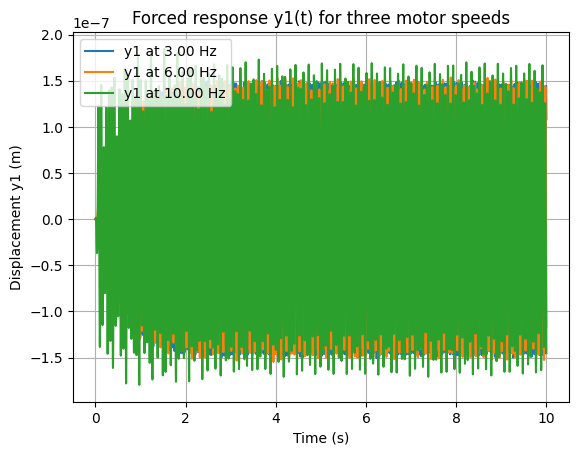

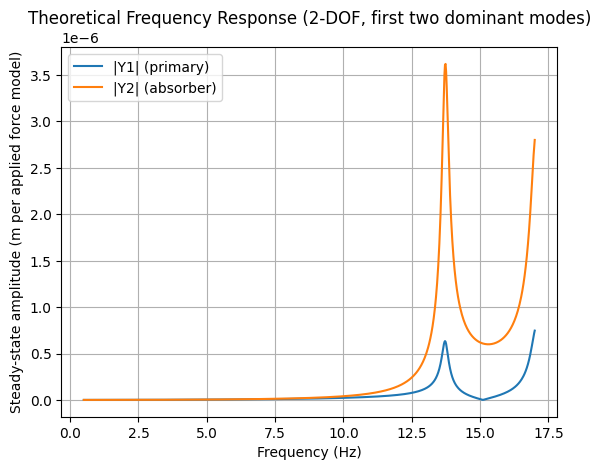

Top ~5 amplitude points (y1):
  f = 17.000 Hz, |Y1| = 7.464153e-07 m
  f = 16.979 Hz, |Y1| = 7.187544e-07 m
  f = 16.959 Hz, |Y1| = 6.869931e-07 m
  f = 16.938 Hz, |Y1| = 6.528909e-07 m
  f = 13.717 Hz, |Y1| = 6.334420e-07 m


In [12]:
# 2-DOF model (primary beam SDOF using Rayleigh improved theory + absorber)
# Plots:
# (1) Unforced response to an initial displacement of the spring end of the beam (y1)
# (2) Forced response for three motor speeds
# (3) Theoretical frequency response capturing first two dominant modes (|Y1(ω)|)

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -----------------------------
# 0) USER INPUTS
# -----------------------------

# --- Primary (beam equivalent, simply supported) ---
m_beam = 1.65      # kg  (from user guide)
m_exciter = 4.2    # kg  (from user guide; exciter mass)

# Rayleigh improved effective mass (from guide)
m1 = m_exciter + (17/35)*m_beam

# Equivalent beam stiffness
k1 = 4.74e4        # N/m  (from user-guide)
# Primary damping
c1 = 20.0          # N·s/m

# --- Absorber (per side) ---
# TecQuipment guide sometimes uses "2m2" and "2ka" because there are two symmetric sides.
# Use per-side values here, then the code uses 2*m2 and 2*ka in matrices.
m2 = 0.121         # kg per movable mass
ka = 1.09e3        # N/m per side

# Absorber damping
c2 = 0.0           # N·s/m per side

# --- Forcing amplitude model ---
# External excitation: F(t) = F0 * sin(Ω t). Can either:
# A) set a constant F0, or
# B) make F0 depend on Ω using unbalance: F0 = mu*e*Ω^2.
use_unbalance_force = True
mu = 0.0042        # kg  (equivalent unbalance mass)
e  = 0.000035      # m   (eccentricity radius)

# --- Simulation settings ---
t_end = 10.0       # seconds
fs_plot = 2000     # plotting sample rate for smooth curves

# Initial condition: "initial displacement of the spring end of the beam"
# In this simplified model, y1 is the beam/spring-end (primary) displacement coordinate.
y1_0 = 0.005       # m (5 mm) initial displacement
y2_0 = 0.0         # m
v1_0 = 0.0         # m/s
v2_0 = 0.0         # m/s

# Three motor speeds for forced response (choose in Hz; convert to rad/s inside)
# Example: below resonance, near first mode, between modes
forced_speeds_hz = [3.0, 6.0, 10.0]  # Hz

# Frequency response sweep range (Hz)
fmin, fmax, npts = 0.5, 17.0, 800   # up to 17 Hz matches motor max

# -----------------------------
# 1) Build 2-DOF matrices
# -----------------------------
# State vector: y = [y1, y2]^T  (primary displacement, absorber displacement)
# Matrices based on the TecQuipment-style "two sides" absorber:
# M = [[m1, 0], [0, 2m2]]
# K = [[k1+2ka, -2ka], [-2ka, 2ka]]
# C = [[c1+2c2, -2c2], [-2c2, 2c2]]

M = np.array([[m1, 0.0],
              [0.0, 2*m2]])

K = np.array([[k1 + 2*ka, -2*ka],
              [-2*ka,      2*ka]])

C = np.array([[c1 + 2*c2, -2*c2],
              [-2*c2,      2*c2]])

Minv = np.linalg.inv(M)

# Force location: acts on DOF1 only
def force_vector(t, Omega, F0):
    return np.array([F0*np.sin(Omega*t), 0.0])

# -----------------------------
# 2) Define ODE in first-order form
# -----------------------------
# z = [y1, y2, v1, v2]
def ode(t, z, Omega=0.0, F0=0.0, forced=False):
    y = np.array([z[0], z[1]])
    v = np.array([z[2], z[3]])

    if forced:
        F = force_vector(t, Omega, F0)
    else:
        F = np.zeros(2)

    # M*ydd + C*yd + K*y = F  =>  ydd = M^-1 (F - C*v - K*y)
    ydd = Minv @ (F - C @ v - K @ y)

    return [v[0], v[1], ydd[0], ydd[1]]

def simulate(Omega=0.0, forced=False, t_end=10.0, z0=None):
    if z0 is None:
        z0 = [y1_0, y2_0, v1_0, v2_0]

    t_eval = np.linspace(0.0, t_end, int(fs_plot*t_end)+1)
    sol = solve_ivp(lambda t, z: ode(t, z, Omega=Omega, F0=F0_for(Omega), forced=forced),
                    t_span=(0.0, t_end), y0=z0, t_eval=t_eval, method="RK45")
    return sol.t, sol.y

def F0_for(Omega):
    if not use_unbalance_force:
        return 1.0  # N (constant forcing)
    return mu*e*(Omega**2)

# -----------------------------
# 3) Plot 1: Unforced response (free vibration)
# -----------------------------
t, y = simulate(forced=False, t_end=t_end, z0=[y1_0, y2_0, v1_0, v2_0])
y1 = y[0, :]
y2 = y[1, :]

plt.figure()
plt.plot(t, y1, label="y1 (primary/beam)")
plt.plot(t, y2, label="y2 (absorber)")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Unforced response to initial displacement (free vibration)")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 4) Plot 2: Forced responses for 3 motor speeds
# -----------------------------
plt.figure()
for f_hz in forced_speeds_hz:
    Omega = 2*np.pi*f_hz
    t, y = simulate(Omega=Omega, forced=True, t_end=t_end,
                    z0=[0.0, 0.0, 0.0, 0.0])  # start from rest for forced response
    y1 = y[0, :]
    plt.plot(t, y1, label=f"y1 at {f_hz:.2f} Hz")

plt.xlabel("Time (s)")
plt.ylabel("Displacement y1 (m)")
plt.title("Forced response y1(t) for three motor speeds")
plt.legend()
plt.grid(True)
plt.show()

# -----------------------------
# 5) Plot 3: Theoretical frequency response (steady-state amplitude vs frequency)
# -----------------------------
# Use complex frequency response:
# Y(Ω) = [ -Ω^2 M + iΩ C + K ]^-1 * F
# where F = [F0, 0]^T
freqs = np.linspace(fmin, fmax, npts)
amps_y1 = np.zeros_like(freqs)
amps_y2 = np.zeros_like(freqs)

for i, f in enumerate(freqs):
    Omega = 2*np.pi*f
    F0 = F0_for(Omega)
    F = np.array([F0, 0.0], dtype=complex)

    Z = (-Omega**2)*M + 1j*Omega*C + K  # dynamic stiffness matrix
    Y = np.linalg.solve(Z, F)          # complex steady-state response
    amps_y1[i] = np.abs(Y[0])
    amps_y2[i] = np.abs(Y[1])

plt.figure()
plt.plot(freqs, amps_y1, label="|Y1| (primary)")
plt.plot(freqs, amps_y2, label="|Y2| (absorber)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Steady-state amplitude (m per applied force model)")
plt.title("Theoretical Frequency Response (2-DOF, first two dominant modes)")
plt.legend()
plt.grid(True)
plt.show()

# Optional: indicate approximate resonance peaks for y1
# (rough peak finding without extra libraries)
peak_idx = np.argpartition(amps_y1, -5)[-5:]
peak_idx = peak_idx[np.argsort(amps_y1[peak_idx])[::-1]]
print("Top ~5 amplitude points (y1):")
for idx in peak_idx:
    print(f"  f = {freqs[idx]:.3f} Hz, |Y1| = {amps_y1[idx]:.6e} m")


# **Week #2**
# Activity #4


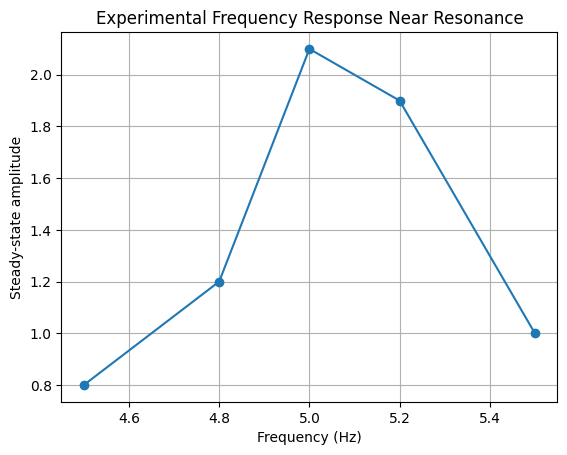

Results:
f_d = 5.0 Hz
ω_d = 31.41592653589793 rad/s
x_ss,max = 2.1


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
f = np.array([4.5, 4.8, 5.0, 5.2, 5.5])      # Frequency in Hz
x = np.array([0.8, 1.2, 2.1, 1.9, 1.0])      # Amplitude (mm or m)

# -----------------------------
# Plot FRF
# -----------------------------
plt.figure()
plt.plot(f, x, marker="o")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Steady-state amplitude")
plt.title("Experimental Frequency Response Near Resonance")
plt.grid(True)
plt.show()

# -----------------------------
# Find resonance
# -----------------------------
i_peak = np.argmax(x)

f_d = f[i_peak]
x_ss_max = x[i_peak]
omega_d = 2*np.pi*f_d

print("Results:")
print("f_d =", f_d, "Hz")
print("ω_d =", omega_d, "rad/s")
print("x_ss,max =", x_ss_max)


In [14]:
import numpy as np

# -------------------------
# 1) Primary effective mass (Rayleigh)
# -------------------------
m_beam = 1.65
m_exciter = 4.2
m1 = m_exciter + (17/35)*m_beam

# -------------------------
# 2) Use EXPERIMENTAL first-mode frequency here
# -------------------------
fn1_exp = 5.0   # Hz
omega1_exp = 2*np.pi*fn1_exp

# Back-calculate equivalent primary stiffness
k1 = m1 * omega1_exp**2

print("m1 =", m1, "kg")
print("Calibrated k1 =", k1, "N/m (from fn1_exp)")

# -------------------------
# 3) Absorber parameters
# -------------------------
m2 = 0.121      # kg per side
ka = 1.09e3     # N/m per side
use_two_sides = True  # set False if absorber acts like single mass-spring

if use_two_sides:
    M = np.array([[m1, 0],
                  [0, 2*m2]], dtype=float)
    K = np.array([[k1 + 2*ka, -2*ka],
                  [-2*ka,      2*ka]], dtype=float)
else:
    M = np.array([[m1, 0],
                  [0, m2]], dtype=float)
    K = np.array([[k1 + ka, -ka],
                  [-ka,      ka]], dtype=float)

# -------------------------
# 4) Solve for 2 natural frequencies
# -------------------------
eigvals = np.linalg.eigvals(np.linalg.inv(M) @ K)
omega = np.sqrt(np.real(eigvals))
f = np.sort(omega/(2*np.pi))

print("\nTheoretical 2-DOF natural frequencies (Hz):")
print("Mode 1:", f[0])
print("Mode 2:", f[1])


m1 = 5.001428571428572 kg
Calibrated k1 = 4936.212144030549 N/m (from fn1_exp)

Theoretical 2-DOF natural frequencies (Hz):
Mode 1: 4.870234108993729
Mode 2: 15.50818102468928


Small differences were observed between the experimental and theoretical resonance frequency and peak amplitude. These discrepancies are mainly due to model simplifications, where the beam was represented as an equivalent lumped mass system while the real beam has distributed mass and higher vibration modes. In addition, the theoretical model assumes ideal viscous damping, whereas the actual system includes friction, structural damping, and fluid damping, which are difficult to model accurately. Uncertainty in the unbalance excitation force and small variations in motor speed also affect the measured response. Furthermore, measurement noise, sensor calibration errors, and the use of discrete frequency steps may slightly shift the estimated resonance peak. Therefore, the observed differences are reasonable and acceptable for an experimental vibration system.

# **Week #3**

# Activity #5



Primary effective mass m1 = 5.001428571428572 kg
Primary natural frequency:
omega_n1 = 97.35138520960004 rad/s
f_n1 = 15.493954172951076 Hz

Chosen absorber mass m2 = 0.121 kg
Mass ratio mu = 0.024193087689231646
Tuned absorber stiffness k2 = 1146.7523564695798 N/m


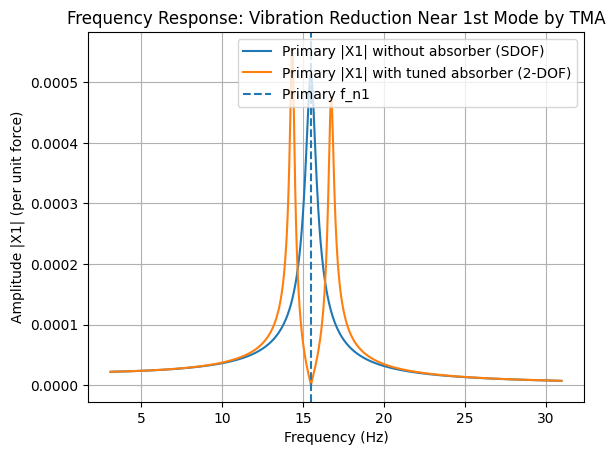

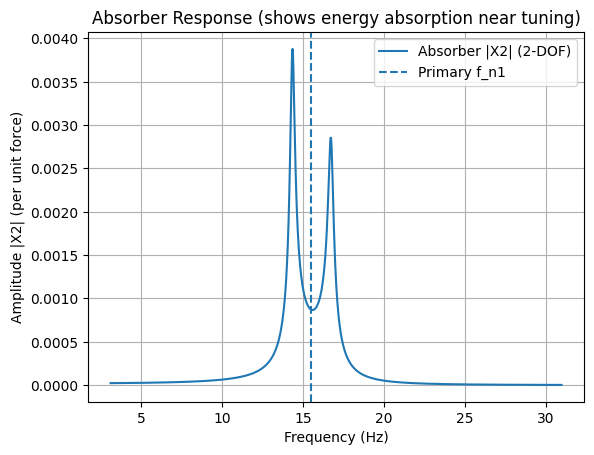


At f = f_n1:
  |X1| without absorber = 0.0005135007846109183
  |X1| with absorber    = 2.9084690139695783e-07
  Reduction factor      = 1765.5363771954883

Near-resonance band (0.7 f_n1 to 1.3 f_n1):
  Max |X1| without absorber = 0.0005135007846109183
  Max |X1| with absorber    = 0.0005551196907309219


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# -----------------------------
# 1) ENTER PRIMARY SYSTEM VALUES
# -----------------------------
# If m1 and k1 already computed in earlier weeks, use the same values here.

m_beam = 1.65      # kg
m_exciter = 4.2    # kg

# Rayleigh improved effective mass
m1 = m_exciter + (17/35)*m_beam

k1 = 4.74e4        # N/m
c1 = 20.0          # N*s/m

print("Primary effective mass m1 =", m1, "kg")

# Primary natural frequency
omega_n1 = np.sqrt(k1/m1)
f_n1 = omega_n1/(2*np.pi)

print("Primary natural frequency:")
print("omega_n1 =", omega_n1, "rad/s")
print("f_n1 =", f_n1, "Hz")

# -----------------------------
# 2) DESIGN THE ABSORBER (CHOOSE m2, COMPUTE k2)
# -----------------------------
# Choose absorber mass based on available lab masses.
# Example: 0.121 kg (121 g) or higher if adjustable.
m2 = 0.121  # kg

# Tune absorber: omega_a = omega_n1
k2 = m2 * omega_n1**2

# Optional absorber damping (often small)
c2 = 0.0

mu = m2/m1
print("\nChosen absorber mass m2 =", m2, "kg")
print("Mass ratio mu =", mu)
print("Tuned absorber stiffness k2 =", k2, "N/m")

# -----------------------------
# 3) FREQUENCY RESPONSE FUNCTIONS
# -----------------------------
def frf_sdof(omega, m1, c1, k1, F0=1.0):
    # X = F / (k - mω^2 + i c ω)
    Z = (k1 - m1*omega**2) + 1j*(c1*omega)
    return F0 / Z

def frf_2dof(omega, m1, c1, k1, m2, c2, k2, F0=1.0):
    # Matrices
    M = np.array([[m1, 0],
                  [0,  m2]], dtype=float)
    C = np.array([[c1 + c2, -c2],
                  [-c2,      c2]], dtype=float)
    K = np.array([[k1 + k2, -k2],
                  [-k2,      k2]], dtype=float)

    # Dynamic stiffness: (-ω^2 M + i ω C + K)
    Z = (-omega**2)*M + 1j*omega*C + K

    F = np.array([F0, 0], dtype=complex)
    X = np.linalg.solve(Z, F)
    return X[0], X[1]  # X1, X2

# -----------------------------
# 4) SWEEP FREQUENCY AND PLOT
# -----------------------------
fmin = max(0.2, 0.2*f_n1)
fmax = 2.0*f_n1
N = 1200

freqs = np.linspace(fmin, fmax, N)
omegas = 2*np.pi*freqs

X1_sdof = np.zeros(N)
X1_2dof = np.zeros(N)
X2_2dof = np.zeros(N)

for i, w in enumerate(omegas):
    X_sd = frf_sdof(w, m1, c1, k1, F0=1.0)
    X1_sdof[i] = np.abs(X_sd)

    X1, X2 = frf_2dof(w, m1, c1, k1, m2, c2, k2, F0=1.0)
    X1_2dof[i] = np.abs(X1)
    X2_2dof[i] = np.abs(X2)

# Plot primary response comparison
plt.figure()
plt.plot(freqs, X1_sdof, label="Primary |X1| without absorber (SDOF)")
plt.plot(freqs, X1_2dof, label="Primary |X1| with tuned absorber (2-DOF)")
plt.axvline(f_n1, linestyle="--", label="Primary f_n1")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude |X1| (per unit force)")
plt.title("Frequency Response: Vibration Reduction Near 1st Mode by TMA")
plt.grid(True)
plt.legend()
plt.show()

# Plot absorber response (optional)
plt.figure()
plt.plot(freqs, X2_2dof, label="Absorber |X2| (2-DOF)")
plt.axvline(f_n1, linestyle="--", label="Primary f_n1")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude |X2| (per unit force)")
plt.title("Absorber Response (shows energy absorption near tuning)")
plt.grid(True)
plt.legend()
plt.show()

# -----------------------------
# 5) QUANTIFY IMPROVEMENT NEAR f_n1
# -----------------------------
# Find the response at the operating frequency near f_n1
i0 = np.argmin(np.abs(freqs - f_n1))
print("\nAt f = f_n1:")
print("  |X1| without absorber =", X1_sdof[i0])
print("  |X1| with absorber    =", X1_2dof[i0])
print("  Reduction factor      =", X1_sdof[i0]/X1_2dof[i0])

# Find max response near the original resonance region (for comparison)
band = (freqs > 0.7*f_n1) & (freqs < 1.3*f_n1)
print("\nNear-resonance band (0.7 f_n1 to 1.3 f_n1):")
print("  Max |X1| without absorber =", np.max(X1_sdof[band]))
print("  Max |X1| with absorber    =", np.max(X1_2dof[band]))


# **Week #4**

# Activity #6



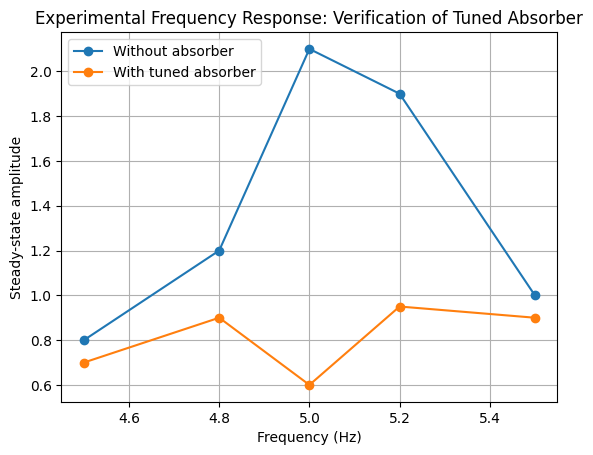

Baseline (no absorber):
  f_peak = 5.0 Hz
  x_ss,max = 2.1

With absorber:
  f_peak (largest remaining) = 5.2 Hz
  x_ss,max = 0.95
  f_antiresonance (min) = 5.0 Hz
  x_ss,min = 0.6

Vibration reduction at baseline resonance frequency:
  % Reduction = 71.42857142857143 %

Peak reduction (max amplitudes):
  % Peak reduction = 54.761904761904766 %


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# ENTER EXPERIMENTAL DATA
# -------------------------
# Same frequency points for both curves is best.
f = np.array([4.5, 4.8, 5.0, 5.2, 5.5])  # Hz

# Without absorber (baseline)
x_no = np.array([0.8, 1.2, 2.1, 1.9, 1.0])

# With absorber (replace with measured values)
x_abs = np.array([0.7, 0.9, 0.6, 0.95, 0.9])

# -------------------------
# PLOT COMPARISON
# -------------------------
plt.figure()
plt.plot(f, x_no, marker="o", label="Without absorber")
plt.plot(f, x_abs, marker="o", label="With tuned absorber")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Steady-state amplitude")
plt.title("Experimental Frequency Response: Verification of Tuned Absorber")
plt.grid(True)
plt.legend()
plt.show()

# -------------------------
# KEY RESULTS
# -------------------------
# Peak (no absorber)
i_peak_no = np.argmax(x_no)
f_d0 = f[i_peak_no]
x_max0 = x_no[i_peak_no]

# Peak (with absorber)
i_peak_abs = np.argmax(x_abs)
f_d_abs = f[i_peak_abs]
x_max_abs = x_abs[i_peak_abs]

# Notch (minimum) with absorber near tuning region
i_min_abs = np.argmin(x_abs)
f_anti = f[i_min_abs]
x_min_abs = x_abs[i_min_abs]

print("Baseline (no absorber):")
print("  f_peak =", f_d0, "Hz")
print("  x_ss,max =", x_max0)

print("\nWith absorber:")
print("  f_peak (largest remaining) =", f_d_abs, "Hz")
print("  x_ss,max =", x_max_abs)
print("  f_antiresonance (min) =", f_anti, "Hz")
print("  x_ss,min =", x_min_abs)

# Reduction at baseline resonance frequency (closest point)
# (If both datasets share same f points, just use that index)
reduction_percent = (x_no[i_peak_no] - x_abs[i_peak_no]) / x_no[i_peak_no] * 100
print("\nVibration reduction at baseline resonance frequency:")
print("  % Reduction =", reduction_percent, "%")

# Peak reduction (optional)
peak_reduction_percent = (x_max0 - x_max_abs) / x_max0 * 100
print("\nPeak reduction (max amplitudes):")
print("  % Peak reduction =", peak_reduction_percent, "%")
